In [ ]:
%matplotlib inline

: 

# Destination
This notebook intends to validate a procedure, which aims to implement the full pipeline of reconstructing a image using ISMRMRD format data.

## Procedure

### Validating full sampling 
1. Generate a testdata (full sampling) in the format of ISMRMRD.
```
ismrmrd_generate_cartesian_shepp_logan -k -o testdata_full.h5
```
2. testdata inline

3. testdata with gadgetron

4. testdata outside

In [19]:
!ismrmrd_generate_cartesian_shepp_logan -k -o testdata_full.h5

Generating Cartesian Shepp Logan Phantom!!!
Acceleration: 1


In [55]:
import pathlib
from gadpipe.utils import dummy_conn
from gadpipe.recon import radial_recon

Loading /workspaces/gadgetron/work/gadgetron-4-fun/gadgetron-python-demo/../testdata_full.h5...
Extracting Header info...
512 acquisitions included
256 raw data extracted
matrixSizeType(x=512, y=256, z=1)
Assembling buffer from 256 acquisitions.
Trajectory shape:  (512, 256, 2)
K space data shape:  (512, 256, 8)
setting image dimension Nd... (256, 256)
setting spectrum dimension Kd... (512, 256)
setting interpolation size Jd... (6, 6)


<decorator-gen-3>:2: DeprecationWarning: scipy.sparse.linalg.cg called without specifying `atol`. The default value will be changed in a future release. For compatibility, specify a value for `atol` explicitly, e.g., ``cg(..., atol=0)``, or to retain the old behavior ``cg(..., atol='legacy')``


reconstruct images finished!
Plotting images...
Iterating acquisitions finished by next
Iterating acquisitions finished by iteration
Dataset closed


/opt/conda/envs/gadgetron/lib/python3.9/site-packages/ismrmrd/image.py:189: PendingDeprecationWarning: The default behavior of this function is currently column-major which is inconsistent with numpy using row-major by default. In a future version this will be changed. Please switch to setting transpose in this function to false to switch to the new behavior.
  warnings.warn(


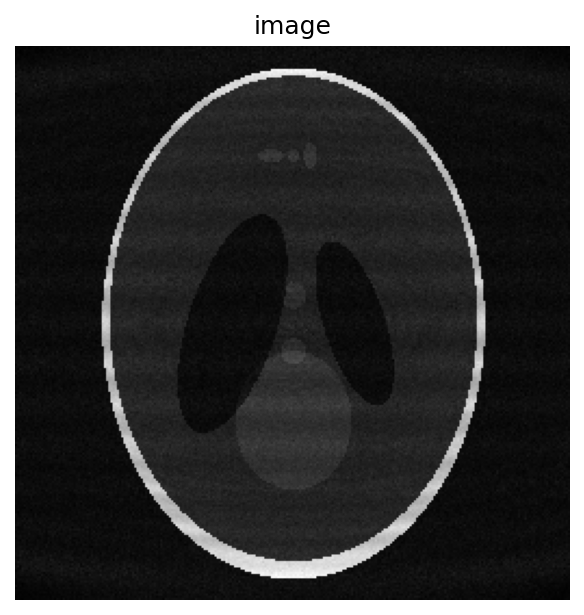

In [15]:
h5_path = pathlib.Path(rf'../testdata_full.h5').absolute()
save_path = pathlib.Path(rf'../testdata_full_out.h5').absolute()
dummy_conn = dummy_conn.DummyConn(h5_path)   # to plot image
radial_recon.recon(dummy_conn)
dummy_conn.close()

### Validating half sampling 
1. Generate a testdata (half sampling) in the format of ISMRMRD.
```
ismrmrd_generate_cartesian_shepp_logan -a 2 -k -o testdata_half.h5
```
2. testdata inline

3. testdata with gadgetron

4. testdata outside

In [18]:
!ismrmrd_generate_cartesian_shepp_logan -a 2 -k -o testdata_half.h5

Generating Cartesian Shepp Logan Phantom!!!
Acceleration: 2


Loading /workspaces/gadgetron/work/gadgetron-4-fun/gadgetron-python-demo/../testdata_half.h5...
Extracting Header info...
256 acquisitions included
128 raw data extracted
matrixSizeType(x=512, y=256, z=1)
Assembling buffer from 128 acquisitions.
Trajectory shape:  (512, 256, 2)
K space data shape:  (512, 256, 8)
setting image dimension Nd... (256, 256)
setting spectrum dimension Kd... (512, 256)
setting interpolation size Jd... (6, 6)


<decorator-gen-3>:2: DeprecationWarning: scipy.sparse.linalg.cg called without specifying `atol`. The default value will be changed in a future release. For compatibility, specify a value for `atol` explicitly, e.g., ``cg(..., atol=0)``, or to retain the old behavior ``cg(..., atol='legacy')``


reconstruct images finished!
Plotting images...


/opt/conda/envs/gadgetron/lib/python3.9/site-packages/ismrmrd/image.py:189: PendingDeprecationWarning: The default behavior of this function is currently column-major which is inconsistent with numpy using row-major by default. In a future version this will be changed. Please switch to setting transpose in this function to false to switch to the new behavior.
  warnings.warn(


Iterating acquisitions finished by next
Iterating acquisitions finished by iteration
Dataset closed


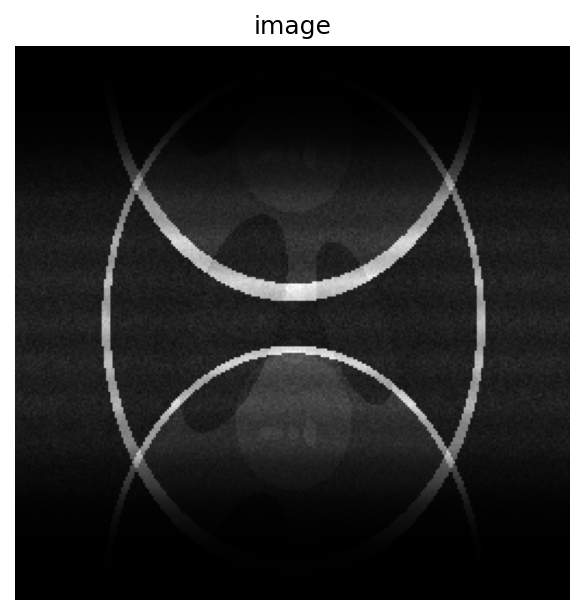

In [17]:
h5_path = pathlib.Path(rf'../testdata_half.h5').absolute()
save_path = pathlib.Path(rf'../testdata_half_out.h5').absolute()
dummy_conn = dcra.DummyConn(h5_path)   # to plot image
dcra.recon(dummy_conn)
dummy_conn.close()

## Validating gadgetron pipeline

copy a XML file from ```$CONDA_PREFIX/share/gadgetron/config/``` and modify it for your case

In [23]:
!ls $CONDA_PREFIX/share/gadgetron/config/*python*.xml

/opt/conda/envs/gadgetron/share/gadgetron/config/external_python_acquisition_example.xml
/opt/conda/envs/gadgetron/share/gadgetron/config/external_python_bucket_example.xml
/opt/conda/envs/gadgetron/share/gadgetron/config/external_python_buffer_example.xml
/opt/conda/envs/gadgetron/share/gadgetron/config/python_buckets.xml
/opt/conda/envs/gadgetron/share/gadgetron/config/python_image_array_recon.xml
/opt/conda/envs/gadgetron/share/gadgetron/config/python_passthrough.xml
/opt/conda/envs/gadgetron/share/gadgetron/config/python_short.xml


In [24]:
!cat $CONDA_PREFIX/share/gadgetron/config/external_python_acquisition_example.xml

<?xml version="1.0" encoding="UTF-8"?>
<configuration>
    <version>2</version>

    <readers>
        <reader>
            <dll>gadgetron_core_readers</dll>
            <classname>AcquisitionReader</classname>
        </reader>
        <reader>
            <dll>gadgetron_core_readers</dll>
            <classname>WaveformReader</classname>
        </reader>
    </readers>

    <writers>
        <writer>
            <dll>gadgetron_core_writers</dll>
            <classname>ImageWriter</classname>
        </writer>
    </writers>

    <stream>
        <external>
            <execute name="gadgetron.examples" target="recon_acquisitions" type="python"/>
            <configuration/>
        </external>
    </stream>
</configuration>


In [27]:
%%writefile recon_radial.xml 
<?xml version="1.0" encoding="UTF-8"?>
<configuration>
    <version>2</version>

    <readers>
        <reader>
            <dll>gadgetron_core_readers</dll>
            <classname>AcquisitionReader</classname>
        </reader>
        <reader>
            <dll>gadgetron_core_readers</dll>
            <classname>WaveformReader</classname>
        </reader>
    </readers>

    <writers>
        <writer>
            <dll>gadgetron_core_writers</dll>
            <classname>ImageWriter</classname>
        </writer>
    </writers>

    <stream>
        <external>
            <execute name="dummy_conn_recon_acquisitions" target="recon" type="python"/>
...
            <configuration/>
        </external>
    </stream>
</configuration>

Writing recon_radial.xml


In [51]:
# link files needed to gadgetron directory
!ln -s $PWD/dummy_conn_recon_acquisitions.py $CONDA_PREFIX/share/gadgetron/python/dummy_conn_recon_acquisitions.py
!ln -s $PWD/recon_radial.xml $CONDA_PREFIX/share/gadgetron/config/recon_radial.xml

In [31]:
!gadgetron_ismrmrd_client -f testdata_full.h5 -c recon_radial.xml

Gadgetron ISMRMRD client
  -- host            :      localhost
  -- port            :      9002
  -- hdf5 file  in   :      testdata_full.h5
  -- hdf5 group in   :      /dataset
  -- conf            :      recon_radial.xml
  -- loop            :      1
  -- hdf5 file out   :      out.h5
  -- hdf5 group out  :      2022-12-08 07:37:47


## Debugging pipeline 
To debug pipeline, ploting images data in out.h5 is useful


In [52]:
def plot_h5_image(h5_path='out.h5'):
    import h5py
    import matplotlib.pyplot as plt
    import numpy as np
    
    h5_file = h5py.File(h5_path)
    image_series = list(h5_file.keys())
    
    # you may need to modify the index of image_series, here we use index 0
    # The choice of index is based on the date of your out.h5
    image_data = np.array(h5_file[image_series[-1]]['image_0']['data']).squeeze()
    
    fig, ax = plt.subplots(1, 1)
    ax.imshow(image_data, 'gray')
    ax.set_aspect(image_data.shape[0] / image_data.shape[1])
    ax.set_title('image')
    ax.axis('off')
    plt.show()

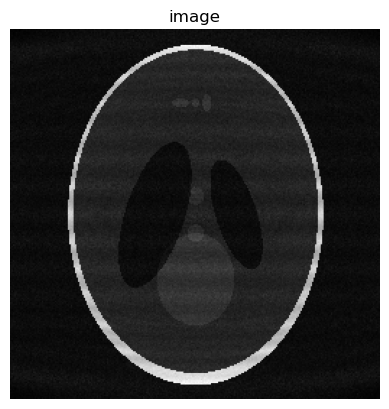

In [53]:
plot_h5_image()